In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir='/content/drive/MyDrive/ds/tea sickness dataset'

In [ ]:
# Set up data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# Load in the dataset
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.


In [ ]:
batch_size=32

In [ ]:
# Step 1: Choose a pre-trained model
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(224, 224, 3))

# Step 2: Load the pre-trained model
model = Sequential()
model.add(base_model)

# Step 3: Freeze initial layers
for layer in base_model.layers:
    layer.trainable = False

# Step 4: Add new classification layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 21139528 (80.64 MB)
Trainable params: 6424840 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
# Step 5: Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_data,
    epochs=20,
    batch_size=batch_size,
    validation_data=val_data
)

Epoch 1/20
23/23 [==============================] - 378s 16s/step - loss: 0.9977 - accuracy: 0.6385 - val_loss: 1.1958 - val_accuracy: 0.5287
Epoch 2/20
23/23 [==============================] - 373s 16s/step - loss: 0.9142 - accuracy: 0.6582 - val_loss: 1.1785 - val_accuracy: 0.5230
Epoch 3/20
23/23 [==============================] - 378s 17s/step - loss: 0.8304 - accuracy: 0.6850 - val_loss: 1.1787 - val_accuracy: 0.5230
Epoch 4/20
23/23 [==============================] - 387s 17s/step - loss: 0.8175 - accuracy: 0.6920 - val_loss: 1.0315 - val_accuracy: 0.6034
Epoch 5/20
23/23 [==============================] - 377s 16s/step - loss: 0.7261 - accuracy: 0.7201 - val_loss: 1.1311 - val_accuracy: 0.5057
Epoch 6/20
23/23 [==============================] - 378s 17s/step - loss: 0.6895 - accuracy: 0.7454 - val_loss: 1.0417 - val_accuracy: 0.5977
Epoch 7/20
23/23 [==============================] - 368s 16s/step - loss: 0.6154 - accuracy: 0.7651 - val_loss: 1.0819 - val_accuracy: 0.5690
Epoch 

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()

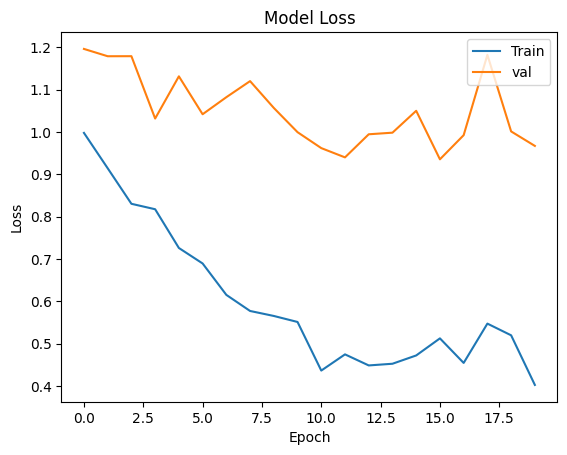

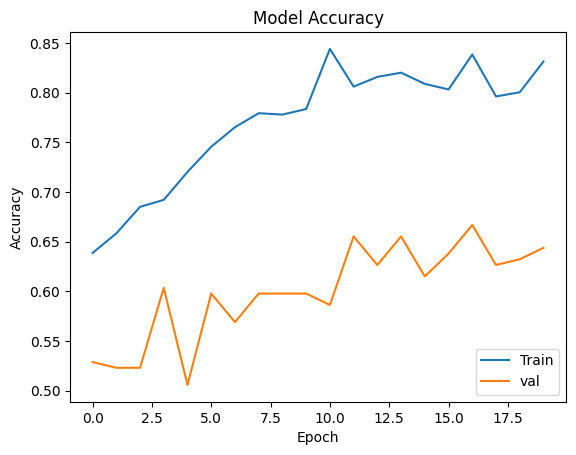

In [ ]:
plot_loss(history)
plot_accuracy(history)


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')

Found 528 images belonging to 8 classes.


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

17/17 [==============================] - 218s 13s/step - loss: 0.5358 - accuracy: 0.7955
Test Loss: 0.5358235836029053
Test Accuracy: 0.7954545617103577


In [ ]:
# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

17/17 [==============================] - 223s 13s/step


In [ ]:
# Generate the classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.05      0.03      0.04        60
           1       0.12      0.13      0.13        67
           2       0.08      0.12      0.10        60
           3       0.14      0.09      0.11        67
           4       0.13      0.13      0.13        60
           5       0.07      0.07      0.07        44
           6       0.23      0.21      0.22        85
           7       0.17      0.21      0.19        85

    accuracy                           0.13       528
   macro avg       0.12      0.12      0.12       528
weighted avg       0.13      0.13      0.13       528



In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 2  4 12  8 11  4 11  8]
 [ 7  9 14  4  5  7  8 13]
 [ 5 11  7  8  4  7  6 12]
 [ 4  8  7  6  8  8 10 16]
 [ 6 13  6  6  8  4  7 10]
 [ 2  4  7  0  8  3  7 13]
 [ 6 12 14  6  8  5 18 16]
 [ 5 11 18  6 10  5 12 18]]


1/1 [==============================] - 12s 12s/step


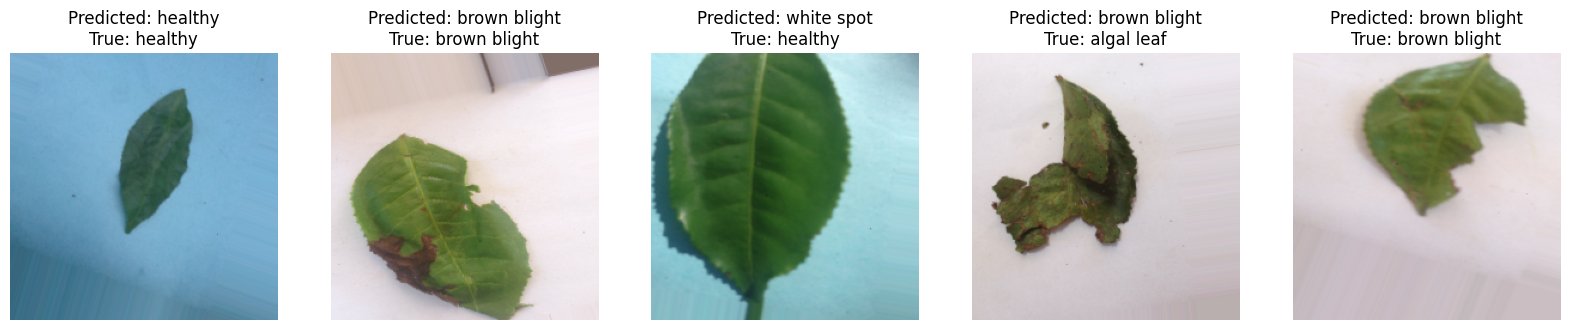

In [ ]:
import matplotlib.pyplot as plt

# Get a few images from the test set
num_images = 5
test_images, test_labels = next(test_data)

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.argmax(test_labels, axis=1)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()

In [ ]:
model.save("t.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
